<a href="https://colab.research.google.com/github/Shreyagautam29/Hand_written_Digit_Classification.ipynb/blob/main/Hand_written_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HAND WRITTEN DIGIT PREDICTOR

The digit dataset consits of 8*8 pixel images of digits. The image attribute of dataset stores 8*8 grayscale values for each image.

IMPORT LIBRARY

In [3]:
import pandas as pd


In [4]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt


IMPORT DATA

In [8]:
from sklearn.datasets import load_digits

In [9]:
df = load_digits()

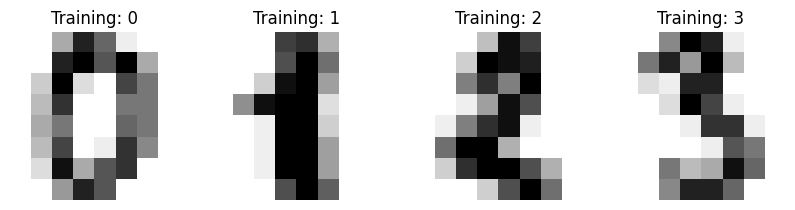

In [10]:
# Create a figure with 4 subplots
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

# Iterate through the axes, images, and labels
for ax, image, label in zip(axes, df.images, df.target):
    # Turn off the axis
    ax.set_axis_off()

    # Display the image
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")

    # Set the title
    ax.set_title("Training: %i" % label)


DATA PROCESSING

FLATTEN IMAGE

In [11]:
df.images.shape

(1797, 8, 8)

In [12]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [13]:
df.images[0].shape

(8, 8)

In [14]:
len (df.images)

1797

In [15]:
n_samples = len (df.images)
data= df.images.reshape((n_samples, -1))

In [16]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [17]:
data[0].shape

(64,)

In [18]:
data.shape

(1797, 64)

SCALING IMAGE DATA

In [19]:
data.min()

0.0

In [20]:
data.max()

16.0

In [22]:
data=data/16

In [23]:
data.min()

0.0

In [24]:
data.max()

0.0625

In [25]:
data[0]

array([0.        , 0.        , 0.01953125, 0.05078125, 0.03515625,
       0.00390625, 0.        , 0.        , 0.        , 0.        ,
       0.05078125, 0.05859375, 0.0390625 , 0.05859375, 0.01953125,
       0.        , 0.        , 0.01171875, 0.05859375, 0.0078125 ,
       0.        , 0.04296875, 0.03125   , 0.        , 0.        ,
       0.015625  , 0.046875  , 0.        , 0.        , 0.03125   ,
       0.03125   , 0.        , 0.        , 0.01953125, 0.03125   ,
       0.        , 0.        , 0.03515625, 0.03125   , 0.        ,
       0.        , 0.015625  , 0.04296875, 0.        , 0.00390625,
       0.046875  , 0.02734375, 0.        , 0.        , 0.0078125 ,
       0.0546875 , 0.01953125, 0.0390625 , 0.046875  , 0.        ,
       0.        , 0.        , 0.        , 0.0234375 , 0.05078125,
       0.0390625 , 0.        , 0.        , 0.        ])

TRAIN TEST SPLIT DATA

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.2)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

RANDOM FOREST MODEL

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf= RandomForestClassifier()

In [33]:
rf.fit(X_train,y_train)

RandomForestClassifier()

PREDICT TEST DATA

In [34]:
y_pred = rf.predict(X_test)

In [35]:
y_pred

array([7, 7, 7, 3, 1, 0, 3, 5, 4, 0, 5, 8, 8, 5, 1, 9, 5, 6, 2, 5, 4, 5,
       1, 2, 4, 1, 6, 8, 2, 9, 9, 5, 1, 8, 1, 0, 0, 6, 3, 2, 2, 3, 4, 0,
       1, 0, 0, 7, 9, 3, 1, 2, 5, 7, 8, 8, 7, 7, 9, 5, 7, 3, 3, 3, 9, 8,
       6, 1, 0, 2, 6, 9, 1, 4, 8, 6, 1, 9, 2, 0, 6, 4, 0, 1, 9, 4, 8, 6,
       3, 0, 6, 2, 3, 9, 6, 8, 7, 5, 8, 7, 6, 4, 0, 2, 8, 1, 6, 2, 0, 3,
       8, 2, 8, 8, 4, 1, 8, 9, 9, 9, 3, 1, 2, 3, 9, 7, 0, 3, 1, 9, 1, 7,
       0, 6, 5, 2, 4, 9, 6, 3, 3, 0, 6, 0, 4, 8, 6, 5, 8, 8, 0, 5, 8, 2,
       0, 6, 7, 1, 6, 4, 6, 0, 3, 3, 0, 1, 9, 5, 8, 5, 3, 6, 9, 8, 1, 1,
       1, 5, 4, 0, 2, 5, 0, 0, 8, 0, 4, 6, 3, 1, 8, 1, 3, 4, 4, 2, 3, 7,
       1, 6, 1, 3, 5, 7, 3, 5, 2, 4, 2, 3, 3, 0, 8, 4, 7, 5, 7, 0, 6, 1,
       8, 3, 4, 1, 8, 1, 2, 4, 2, 7, 0, 1, 2, 9, 0, 0, 6, 0, 6, 5, 4, 4,
       4, 5, 3, 1, 5, 8, 7, 7, 9, 6, 0, 6, 2, 5, 5, 1, 5, 7, 3, 8, 3, 1,
       7, 2, 4, 6, 5, 5, 0, 1, 0, 9, 6, 0, 5, 9, 4, 7, 9, 5, 5, 9, 9, 8,
       4, 0, 9, 7, 5, 6, 7, 1, 5, 8, 7, 8, 5, 9, 6,

MODEL ACCURACY

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
confusion_matrix(y_test, y_pred)

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 29,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 31,  0,  0,  1,  1,  1],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  1],
       [ 1,  1,  0,  0,  0,  1, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 29,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 39,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  0, 28]])

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       0.96      1.00      0.98        43
           2       1.00      1.00      1.00        29
           3       0.97      0.95      0.96        40
           4       0.97      0.91      0.94        34
           5       0.92      0.97      0.94        35
           6       1.00      0.92      0.96        38
           7       0.94      1.00      0.97        29
           8       0.97      0.95      0.96        41
           9       0.90      0.90      0.90        31

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

